an img is a 2d array of pixel values (0-black, white-255)

first we flatten this arr to n*1 arr to input to each unit (eg: 7x7 to 49row arr)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5

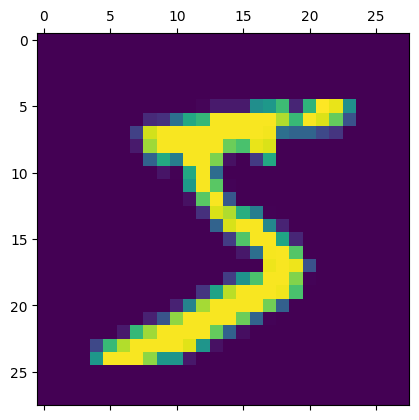

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test)= keras.datasets.mnist.load_data()

#check images/samples in train n test
len(X_train)
len(X_test)

#check what each sample looks like
X_train[0].shape
plt.matshow(X_train[0])
y_train[0] #confirm

flatten the 28x28 arr

In [ ]:
#scale to improve accuracy
X_train=X_train/255
X_test=X_test/255


X_train_flat= X_train.reshape(60000,28*28)
X_train_flat.shape

(60000, 784)

In [ ]:
X_test_flat=X_test.reshape(10000,28*28)
X_test_flat.shape

(10000, 784)

In [ ]:
#make nn                                  output units
model= keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'  )])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #for 0&1- BinaryCrossentropy
model.fit(X_train_flat,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4778 - loss: 2.2447
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6953 - loss: 2.0267
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7357 - loss: 1.8342
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7571 - loss: 1.6667
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7717 - loss: 1.5167
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7861 - loss: 1.3904
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7958 - loss: 1.2766
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8042 - loss: 1.1817
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8140 - loss: 1.0971
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8183 - loss: 1.0315


to improve accuracy, scale values
also now check on test dataset

In [ ]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3043


[0.26909205317497253, 0.9239000082015991]

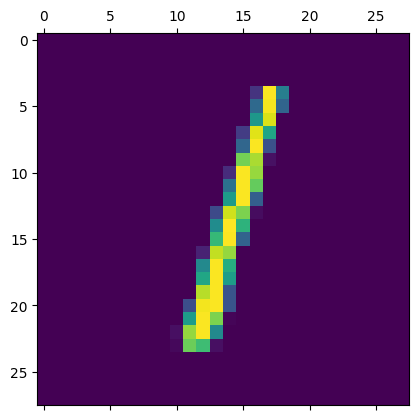

In [ ]:
plt.matshow(X_test[2])

In [ ]:
y_predict=model.predict(X_test_flat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_predict[2]


array([1.7873078e-04, 9.9540257e-01, 6.8383920e-01, 2.7866235e-01,
       2.3084104e-02, 1.2436401e-01, 1.3620314e-01, 8.2189202e-02,
       2.7648330e-01, 2.9743075e-02], dtype=float32)

In [ ]:
np.argmax(y_predict[2])

1

lets create a confusion matrix(see the right n wrong predictions done by model in matrix form)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predict] #find predicted values of all imgs in xtest/ypredict
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

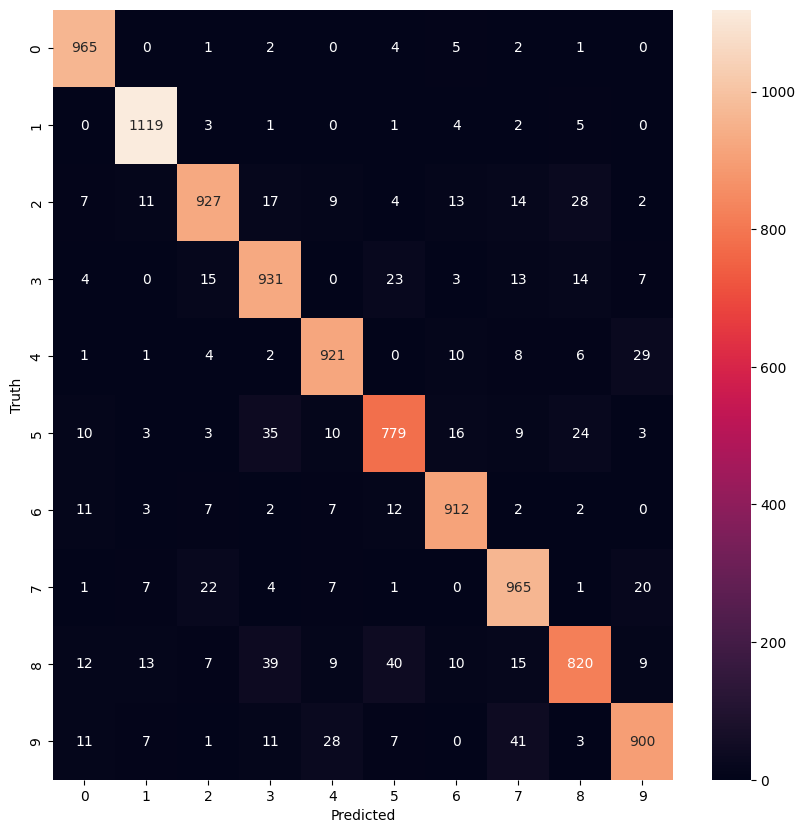

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) #rows= actual y test answer, col= no. of times correct prdxn or argmax made

import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d') #decimal true values
plt.xlabel('Predicted')
plt.ylabel('Truth')

adding hidden layer


In [ ]:
model= keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8754 - loss: 0.4402
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9616 - loss: 0.1298
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0854
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9804 - loss: 0.0653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9852 - loss: 0.0480
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9891 - loss: 0.0386
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9910 - loss: 0.0298
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9931 - loss: 0.0234
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9949 - loss: 0.0185
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9953 - loss: 0.0165
